### 1. Import Required Libraries

In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud

# NLP and text processing
import html
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Explainability
import shap
import lime
import lime.lime_text

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 2. Load and Inspect the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('fake_job_postings.csv')

In [3]:
# first five columns
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
# Display number of rows and columns
df.shape

(17880, 18)

In [5]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

### 3: Data Cleaning and Preprocessing

In [6]:
df.sample(1)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17606,17607,Assistant Accountant for immediate start,"AU, NSW, Sydney",NaN,35000-40000,NaN,"A active and dynamic recruitment company, seek...",The responsibilities of this role will include...,Get trained and get paid for it. Flexible hour...,0,0,0,Part-time,NaN,NaN,Accounting,Accounting/Auditing,1


In [7]:
columns = list(df.columns)
columns

['job_id',
 'title',
 'location',
 'department',
 'salary_range',
 'company_profile',
 'description',
 'requirements',
 'benefits',
 'telecommuting',
 'has_company_logo',
 'has_questions',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'fraudulent']

In [8]:
for col in columns:
    null_count = df[col].isnull().sum()
    print(f"Column {col} has {null_count} null values")

Column job_id has 0 null values
Column title has 0 null values
Column location has 346 null values
Column department has 11547 null values
Column salary_range has 15012 null values
Column company_profile has 3308 null values
Column description has 1 null values
Column requirements has 2696 null values
Column benefits has 7212 null values
Column telecommuting has 0 null values
Column has_company_logo has 0 null values
Column has_questions has 0 null values
Column employment_type has 3471 null values
Column required_experience has 7050 null values
Column required_education has 8105 null values
Column industry has 4903 null values
Column function has 6455 null values
Column fraudulent has 0 null values


In [9]:
# Display target distribution
df['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

In [10]:
# Create a short helper to get text length for the 'description' column
df['desc_len'] = df['description'].astype(str).apply(len)
df['desc_len'][:20]

0      905
1     2077
2      355
3     2600
4     1520
5     3418
6      433
7     2488
8       75
9     1219
10    2878
11    1159
12    1721
13     793
14     986
15    2995
16     314
17     390
18    1561
19    1391
Name: desc_len, dtype: int64

### Plot target balance

In [11]:
plt.rcParams['figure.figsize'] = (8,5)
sns.set()

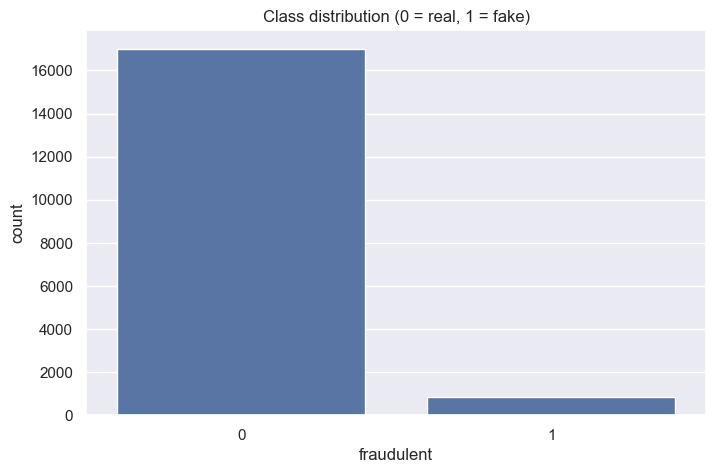

In [12]:
sns.countplot(x='fraudulent', data=df)
plt.title('Class distribution (0 = real, 1 = fake)')
plt.show()

### Plot description length distribution (real vs fake)

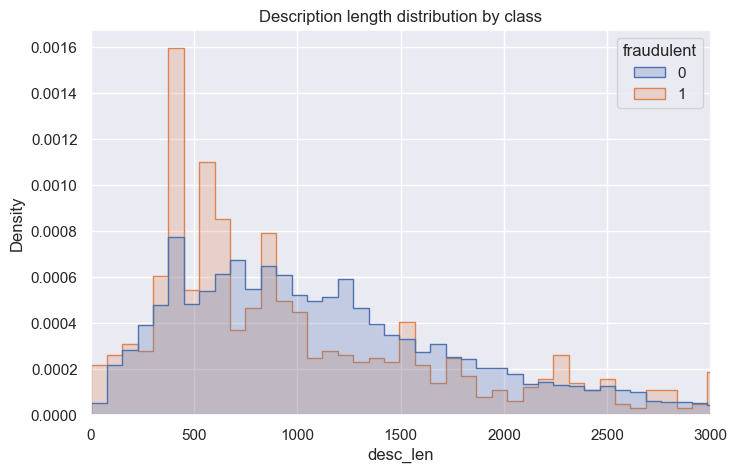

In [13]:
sns.histplot(data=df, x='desc_len', hue='fraudulent', element='step', stat='density', common_norm=False)
plt.title('Description length distribution by class')
plt.xlim(0, 3000)
plt.show()

### Visualize the missing value count

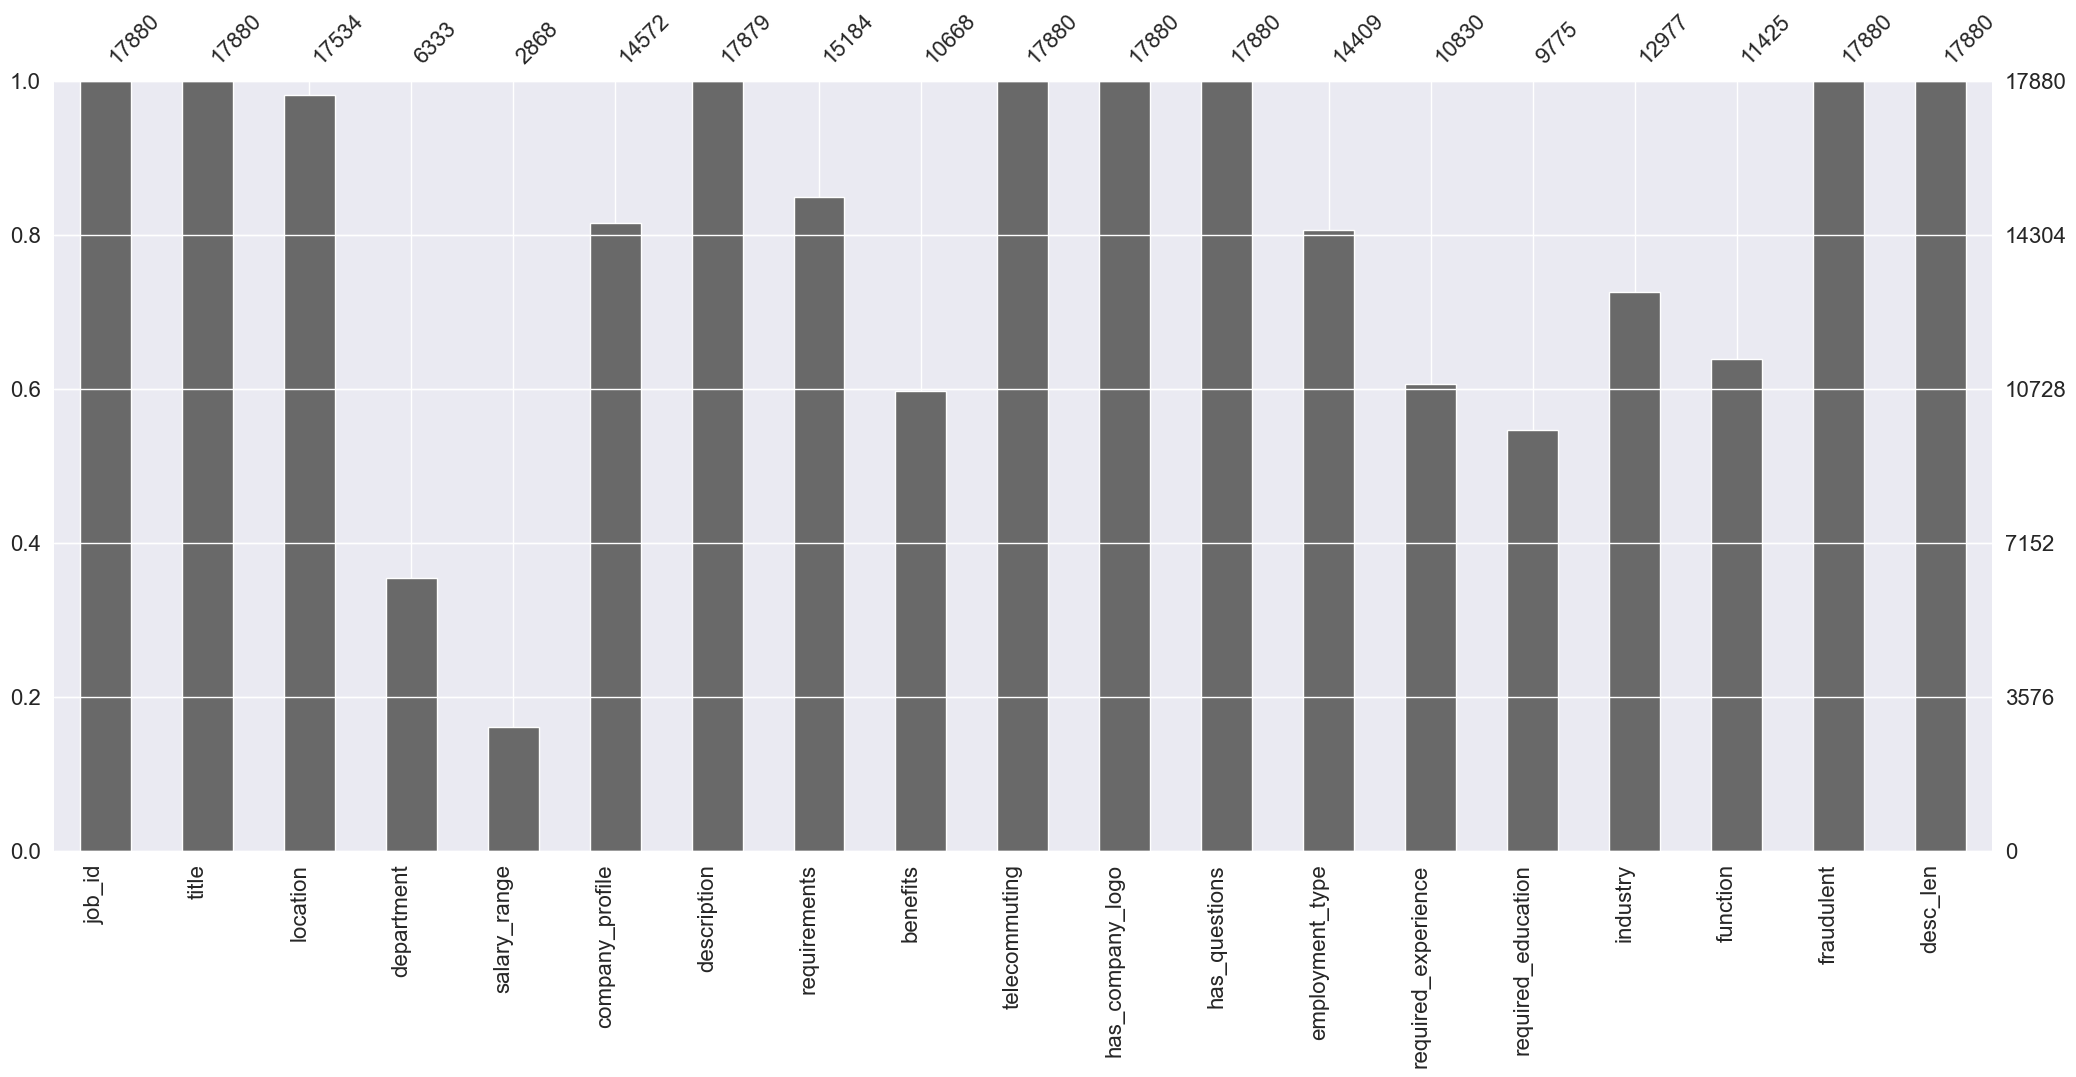

In [14]:
ax = msno.bar(df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xticks(rotation=45)

plt.show()

### employment_type vs fraudulent

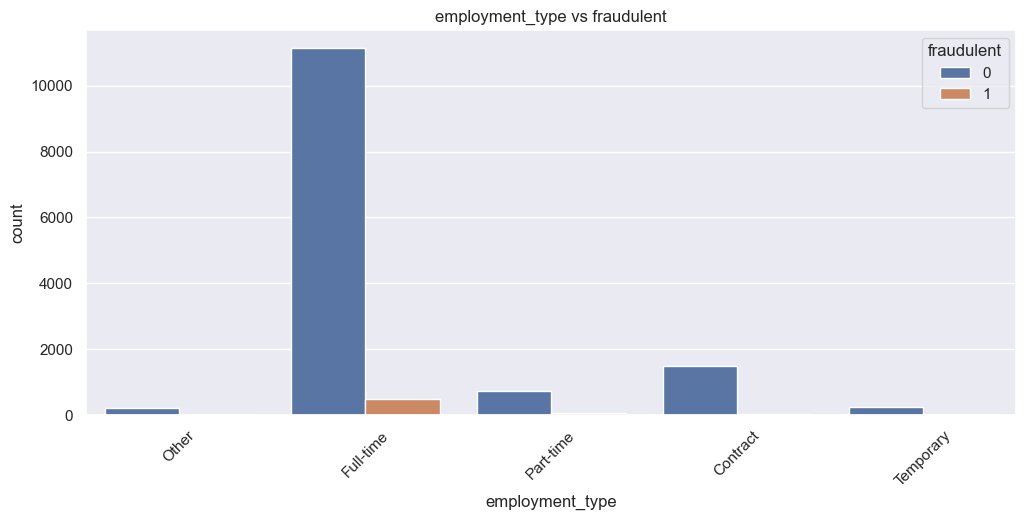

In [15]:
plt.rcParams['figure.figsize'] = (12,5)

sns.countplot(data=df, x='employment_type', hue='fraudulent')
plt.xticks(rotation=45)
plt.title("employment_type vs fraudulent")
plt.show()

### required_experience vs fraudulent

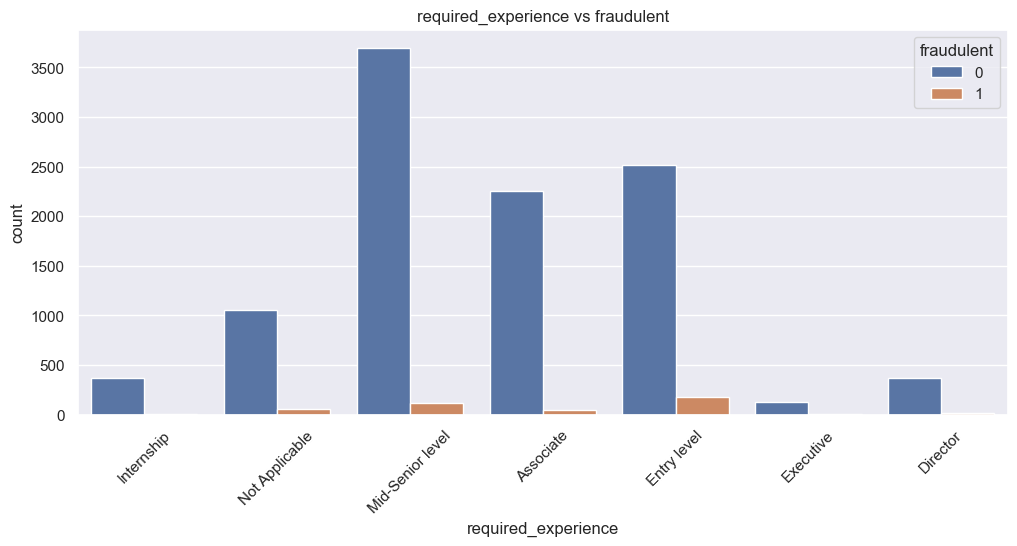

In [16]:
plt.rcParams['figure.figsize'] = (12,5)

sns.countplot(data=df, x='required_experience', hue='fraudulent')
plt.xticks(rotation=45)
plt.title("required_experience vs fraudulent")
plt.show()

### required_education vs fraudulent

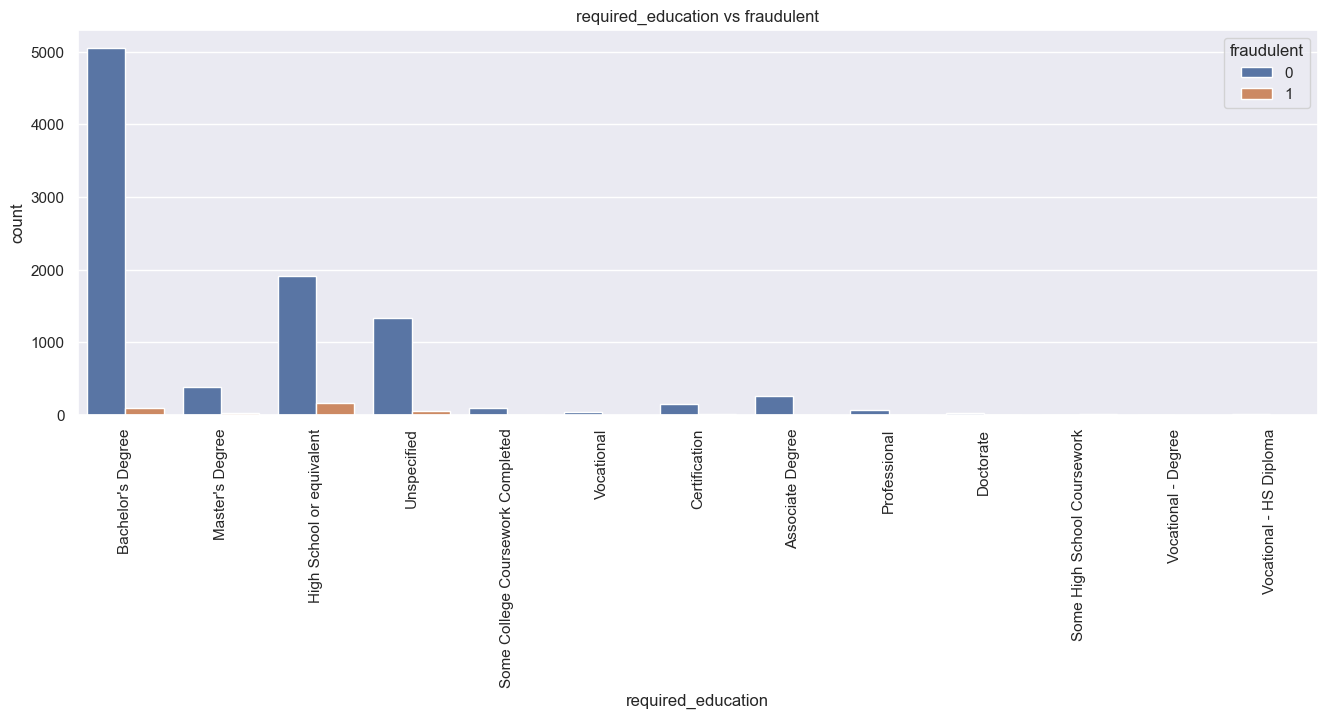

In [17]:
plt.rcParams['figure.figsize'] = (16,5)

sns.countplot(data=df, x='required_education', hue='fraudulent')
plt.xticks(rotation=90)
plt.title("required_education vs fraudulent")
plt.show()

In [18]:
df.sample(1)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,desc_len
13109,13110,Lean Manufacturing,"US, IL, Chicago",NaN,NaN,We Provide Full Time Permanent Positions for m...,(We have more than 1500+ Job openings in our w...,NaN,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0,1000


### Combine the text columns

In [19]:
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']

# Combine the text columns
df['text'] = (df['title'].fillna('') + ' \n' +
              df['company_profile'].fillna('') + ' \n' +
              df['description'].fillna('') + ' \n' +
              df['requirements'].fillna('') + ' \n' +
              df['benefits'].fillna(''))

In [20]:
df[['text', 'fraudulent']].sample(5)

,text,fraudulent
2011,Customer Service Advisor \n \nAs part of our O...,0
13709,P/T CONTRACT ActionScript/Flash Developer (Kah...,0
8678,Happiness Recruiter \nWe’re always looking for...,0
5710,Accounts Payable Clerk \n \nStandard Market is...,0
1168,Microsoft .Net and C# back-end developers \nEv...,0


### Text cleaning functions (tokenize, remove html/urls, lemmatize)

In [21]:
# Prepare stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """Lowercase -> remove HTML entities -> remove URLs/emails -> remove non-alpha -> tokenize -> remove stopwords -> lemmatize -> return clean string."""
    if not isinstance(text, str):
        text = str(text)
    # lower
    text = text.lower()
    
    # unescape html
    text = html.unescape(text)
    
    # remove URLs and emails
    text = re.sub(r'http\S+|www\S+|\S+@\S+', ' ', text)
    
    # removing all characters except lowercase letters and whitespace.
    text = re.sub(r'[^a-z\s]', ' ', text)
    
    # collapse whitespace \ normalize whitespace \ remove multiple space, \t, \n
    text = re.sub(r'\s+', ' ', text).strip()
    
    # tokenize & lemmatize
    tokens = [lemmatizer.lemmatize(tok) for tok in text.split() if tok not in stop_words and len(tok) > 1]
    return ' '.join(tokens)

In [22]:
# Apply cleaning to a sample data
sample = df['text'].astype(str).iloc[:1].apply(clean_text)
print(sample.iloc[0])

marketing intern food created groundbreaking award winning cooking site support connect celebrate home cook give everything need one place top editorial business engineering team focused using technology find new better way connect people around specific food interest offer superb highly curated information food cooking attract talented home cook contributor country also publish well known professional like mario batali gwyneth paltrow danny meyer partnership whole food market random house food named best food website james beard foundation iacp featured new york time npr pando daily techcrunch today show located chelsea new york city food fast growing james beard award winning online food community crowd sourced curated recipe hub currently interviewing full part time unpaid intern work small team editor executive developer new york city headquarters reproducing repackaging existing food content number partner site huffington post yahoo buzzfeed various content management systemsresea

### Apply cleaning text function to the whole dataset

In [23]:
df['text_clean'] = df['text'].astype(str).apply(clean_text)

In [24]:
# check
print(df['text_clean'].iloc[0])

marketing intern food created groundbreaking award winning cooking site support connect celebrate home cook give everything need one place top editorial business engineering team focused using technology find new better way connect people around specific food interest offer superb highly curated information food cooking attract talented home cook contributor country also publish well known professional like mario batali gwyneth paltrow danny meyer partnership whole food market random house food named best food website james beard foundation iacp featured new york time npr pando daily techcrunch today show located chelsea new york city food fast growing james beard award winning online food community crowd sourced curated recipe hub currently interviewing full part time unpaid intern work small team editor executive developer new york city headquarters reproducing repackaging existing food content number partner site huffington post yahoo buzzfeed various content management systemsresea

### WordCloud

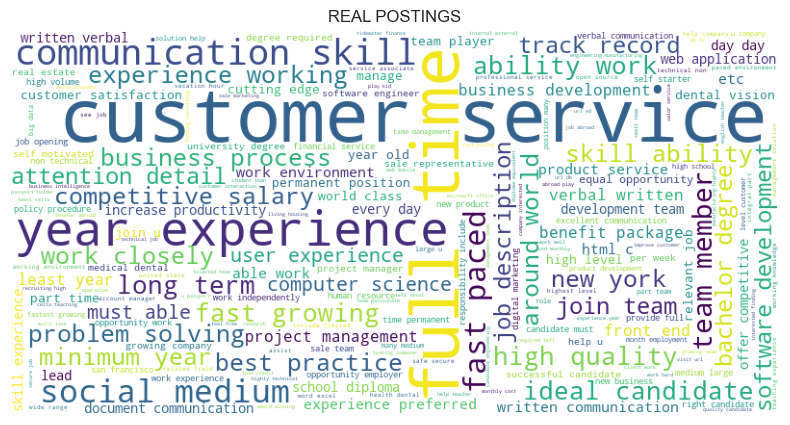

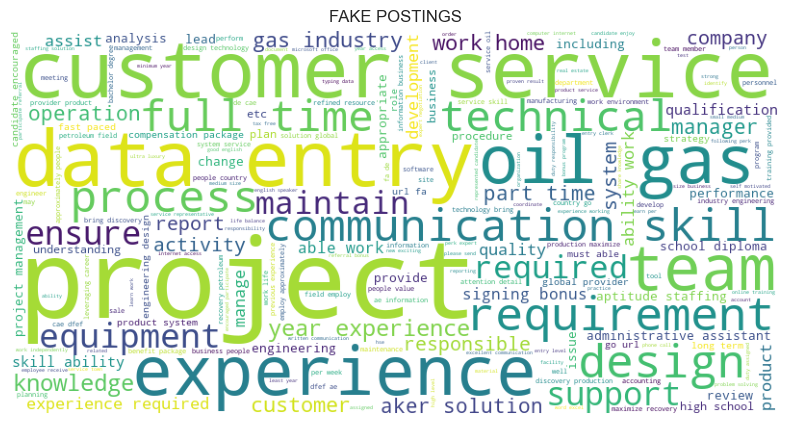

In [25]:
real_text = " ".join(df[df['fraudulent']==0]['text_clean'].dropna())
fake_text = " ".join(df[df['fraudulent']==1]['text_clean'].dropna())

wc_real = WordCloud(width=800, height=400, background_color="white").generate(real_text)
wc_fake = WordCloud(width=800, height=400, background_color="white").generate(fake_text)

plt.imshow(wc_real)
plt.axis("off")
plt.title("REAL POSTINGS")
plt.show()

print("\n" * 3)

plt.imshow(wc_fake)
plt.axis("off")
plt.title("FAKE POSTINGS")
plt.show()

### Text length distributions

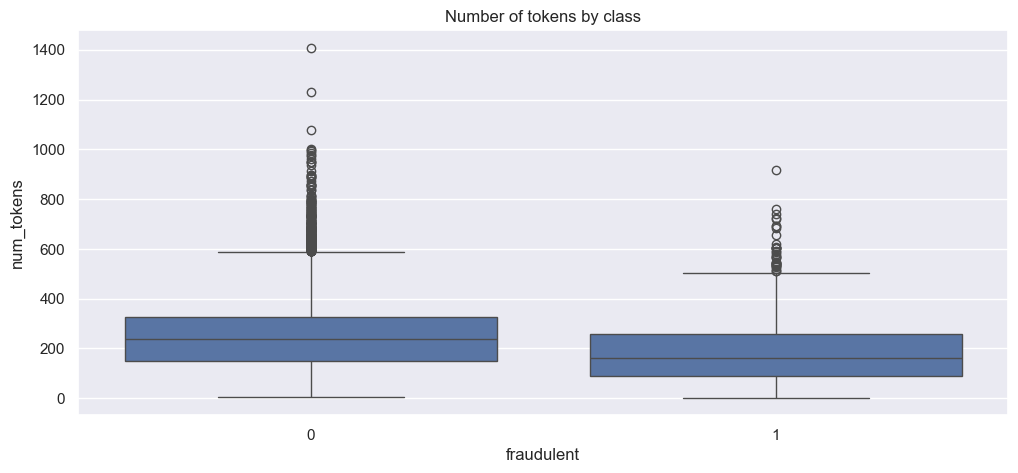

In [26]:
plt.rcParams['figure.figsize'] = (12,5)

df['num_tokens'] = df['text_clean'].apply(lambda x: len(str(x).split()))
sns.boxplot(data=df, x='fraudulent', y='num_tokens')
plt.title("Number of tokens by class")
plt.show()